In [ ]:
import numpy as np 
import pandas as pd 

#from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/5000.csv')

print("Len: " + str(len(df)))

Len: 1440068


In [ ]:
filtered_data = df
filtered_data = filtered_data[(filtered_data['author.playtime_at_review'] >= 1000)& (filtered_data['author.num_games_owned'] > 1000)]
print("Len: " + str(len(filtered_data)))

Len: 8115


In [ ]:
df=filtered_data 

In [ ]:
df = df.dropna()
df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
10,469405,70,Half-Life,84932345,english,"Classic of the classics, never gets outdated. ...",1611005323,1611005323,True,1,...,True,False,False,76561198184596858,2331,316,1375.0,0.0,1375.0,1.562526e+09
1276,470671,70,Half-Life,83864441,english,"[code]\n #+###,,::, , ...",1609636741,1609636804,True,2,...,True,False,False,76561198071533822,3824,41,1198.0,9.0,1188.0,1.610323e+09
1423,470818,70,Half-Life,83739991,polish,Jak ktoś miał pirackie CD w latach 2003-2011 t...,1609518184,1609518184,True,1,...,True,False,False,76561198029227177,1198,46,1840.0,102.0,1290.0,1.609924e+09
2559,471955,70,Half-Life,82651418,english,22 years old is this little game and i've just...,1608329261,1608329261,True,36,...,False,False,False,76561198116836855,2144,14,1127.0,0.0,1127.0,1.608329e+09
2997,472393,70,Half-Life,81856882,turkish,Asla eskimedi warcraft 3 ve diablo ile tanışma...,1607459266,1607459266,True,1,...,True,False,False,76561198031968845,1962,963,1270.0,0.0,1270.0,1.438109e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429437,11531614,1240210,There Is No Game: Wrong Dimension,76504657,spanish,[quote]Para más reseñas como esta sígueme [b][...,1600986987,1600987527,True,8,...,True,False,False,76561198072343374,7510,71,1629.0,0.0,1629.0,1.600977e+09
1436797,10993582,1291340,Townscaper,80460773,italian,Best city builder ever. \nNo citizen complain.,1606426403,1606426403,True,0,...,True,False,True,76561197990711996,1519,20,1251.0,0.0,1017.0,1.609714e+09
1437327,10994112,1291340,Townscaper,80112530,english,"It's a unique, low stress game that at the sam...",1606364426,1606364426,True,0,...,True,False,True,76561198004444982,1451,4,3541.0,0.0,3360.0,1.606930e+09
1437747,10994532,1291340,Townscaper,79827214,english,"If it isn't clear by the previews, this is not...",1606328613,1606328613,True,0,...,True,False,True,76561198091283574,1867,5,3550.0,0.0,3539.0,1.606329e+09


In [ ]:
Columns = ['app_name','language','review']
df_target = df.loc[:, Columns]
df_target.head()

,app_name,language,review
10,Half-Life,english,"Classic of the classics, never gets outdated. ..."
1276,Half-Life,english,"[code]\n #+###,,::, , ..."
1423,Half-Life,polish,Jak ktoś miał pirackie CD w latach 2003-2011 t...
2559,Half-Life,english,22 years old is this little game and i've just...
2997,Half-Life,turkish,Asla eskimedi warcraft 3 ve diablo ile tanışma...


In [ ]:
df = df.drop(columns=Columns)
scaler = MinMaxScaler()
df[list(df.columns)] = scaler.fit_transform(df[list(df.columns)])
df_target.head(60)

,app_name,language,review
10,Half-Life,english,"Classic of the classics, never gets outdated. ..."
1276,Half-Life,english,"[code]\n #+###,,::, , ..."
1423,Half-Life,polish,Jak ktoś miał pirackie CD w latach 2003-2011 t...
2559,Half-Life,english,22 years old is this little game and i've just...
2997,Half-Life,turkish,Asla eskimedi warcraft 3 ve diablo ile tanışma...
3697,Half-Life,turkish,Bu oyunu oynamayanı vururum\n\nOynayacaksınız....
4620,Half-Life,english,A true classic. While some parts of the game ...
5451,Counter-Strike: Source,latam,Un clásico
8436,Counter-Strike: Source,english,Old but old.
9001,Counter-Strike: Source,dutch,Always CS!


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# New imports 
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

In [ ]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

# Should we inlcude title in our analysis?
include_title = False

# some heavy preprocess
i = 0 
def process_row(row):
    global i 
    global include_title
    print("Tfidf Progress: "+str("{:.5f}".format(i/(len(df_target)-1) *100)) + "%",end="\r")
    i += 1
    
    language = row['language']
    reuslt = None
    if(include_title):
        result = (str(row['review']) + " " + str(row['app_name'])).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    else:
        result = (str(row['review'])).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    result = result.replace(',', '')          # Removes commas
    result = result.rstrip('\n')              # Removes line breaks
    result = result.casefold()                # Makes all letters lowercase
    result = result.replace('the', '')        ## Removes all occurrences of 'the'
    result = result.replace('this', '')        ## Removes all occurrences of 'this'
    result = result.replace('of', '')        ## Removes all occurrences of 'of'
    result = result.replace('that', '')        ## Removes all occurrences of 'that'
    result = result.replace('and', '')        ## Removes all occurrences of 'and'
    result = result.replace('with', '')        ## Removes all occurrences of 'with'
    result = result.replace('its', '')        ## Removes all occurrences of 'its'

    result = re.sub('\W_',' ', result)        # removes specials characters and leaves only words
    result = re.sub("\S*\d\S*"," ", result)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    result = re.sub("\S*@\S*\s?"," ", result) # removes emails and mentions (words with @)
    result = re.sub(r'http\S+', '', result)   # removes URLs with http
    result = re.sub(r'www\S+', '', result)    # removes URLs with www
    
    result = re.sub(r"\s+(.)\1+\b", "",result)               # remove spammed chars
    result = ''.join([i for i in result if not i.isdigit()]) # remove numbers
    result = re.sub(r'[^\w\s]','',result)                    # remove punctuation
   

    listOfTokens = word_tokenize(result)
    twoLetterWord = twoLetters(listOfTokens)


    try: 
        # Not all languages are supported 
        # We remove stopwords and stem only with supported languages
        stopwords = nltk.corpus.stopwords.words(language)
        stopwords.append("game")
        
        param_stemmer = SnowballStemmer(language)
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        listOfTokens = removeWords(listOfTokens, stopwords)
        
        

    finally:
        # Output the tokens
        listOfTokens = list(filter(lambda item: len(item) < 25,listOfTokens))   # other spam filter
        listOfTokens = removeWords(listOfTokens, ["game","gam","igr","juego","you","jogao"]) # some game translations (en,en,ru,sp,ch,pt)
        
        result   = " ".join(listOfTokens)
        result = unidecode(result)
        result = re.sub(r'[^\x00-\x7F]+','', result)    # remove non ascii

        return result
    


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
%%time
df_target['tokens'] = df_target.apply(lambda row: process_row(row),axis=1)

CPU times: user 13.4 s, sys: 1.18 s, total: 14.6 s
Wall time: 13.8 s


In [ ]:
df_target

,app_name,language,review,tokens
10,Half-Life,english,"Classic of the classics, never gets outdated. ...",classicclassics never gets outdated oldschool ...
1276,Half-Life,english,"[code]\n #+###,,::, , ...",code www w w ww www w w w w w ww code
1423,Half-Life,polish,Jak ktoś miał pirackie CD w latach 2003-2011 t...,jak ktos mial pirackie cd w latachto warto ucz...
2559,Half-Life,english,22 years old is this little game and i've just...,years old is little ive just played it for ver...
2997,Half-Life,turkish,Asla eskimedi warcraft 3 ve diablo ile tanışma...,asla eskimedi warcraftve diablo ile tanismadan...
...,...,...,...,...
1429437,There Is No Game: Wrong Dimension,spanish,[quote]Para más reseñas como esta sígueme [b][...,quotepara mas resenas como esta siguememi pagi...
1436797,Townscaper,italian,Best city builder ever. \nNo citizen complain.,best city builder ever no citizen complain
1437327,Townscaper,english,"It's a unique, low stress game that at the sam...",its a unique low stress at same time can be ch...
1437747,Townscaper,english,"If it isn't clear by the previews, this is not...",if it isnt clear by previews is not a in tradi...


In [ ]:
%%time
# tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_target['tokens'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

tf_idf.head()

CPU times: user 1.03 s, sys: 982 ms, total: 2.02 s
Wall time: 2.02 s


,0cao,0sabaibarugale,0sutoresunoge,0yarizhi,0zong,2hosts,_z,aa,aaa,aaaa,...,zyskala,zyski,zywicy,zywicznej,zywiolow,zywnosc,zywo,zywota,zywotnosc,zywy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time
bool_list = ['recommended','steam_purchase','received_for_free','written_during_early_access']
df[bool_list] = df[bool_list].astype(int)

CPU times: user 3.11 ms, sys: 4.76 ms, total: 7.87 ms
Wall time: 7.48 ms


In [ ]:
# Combine data
df = pd.concat([df, tf_idf], axis=1)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
    
df = clean_dataset(df)

In [ ]:
df.head()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,zyskala,zyski,zywicy,zywicznej,zywiolow,zywnosc,zywo,zywota,zywotnosc,zywy
10,0.021480,0.0,0.996665,0.998347,0.998347,1.0,0.000869,0.000000,0.537671,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.021539,0.0,0.983896,0.992856,0.992857,1.0,0.001738,0.000000,0.566853,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1423,0.021546,0.0,0.982408,0.992381,0.992381,1.0,0.000869,0.000000,0.537671,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2559,0.021598,0.0,0.969392,0.987611,0.987611,1.0,0.031277,0.004292,0.770775,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.021618,0.0,0.959891,0.984120,0.984120,1.0,0.000869,0.000000,0.518398,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time
df_ = df.copy()

pca__ = IncrementalPCA(n_components = 7, batch_size=128)
reduced = pca__.fit_transform(df)

CPU times: user 1.47 s, sys: 1.4 s, total: 2.87 s
Wall time: 1.26 s


In [ ]:
columns__ = ['pca_comp_%i' % i
   for i in range(reduced.shape[1])
]

df = pd.DataFrame(data = reduced
             , columns = columns__)
df.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6
0,0.308294,-0.105562,-0.087267,-0.038793,0.900511,0.145708,0.004098
1,0.284265,-0.481810,-0.153713,-0.339901,-0.232319,-0.078610,0.600366
2,0.352293,0.399301,0.148709,0.036863,-0.285207,0.719894,-0.002313
3,-0.859569,-0.345057,0.792895,0.091331,0.015039,-0.010344,-0.015417
4,0.452053,0.756952,0.330709,-0.171940,-0.024566,-0.497094,0.002537


In [ ]:
def elbow(df): # Elbow method for best k
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}

    K = range(1, 8)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)

        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / df.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / df.shape[0]
        mapping2[k] = kmeanModel.inertia_

        print("Iter "+str(k)+" of "+str(max(K))+" done...")
    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()
    
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Iter 1 of 7 done...
Iter 2 of 7 done...
Iter 3 of 7 done...
Iter 4 of 7 done...
Iter 5 of 7 done...
Iter 6 of 7 done...
Iter 7 of 7 done...


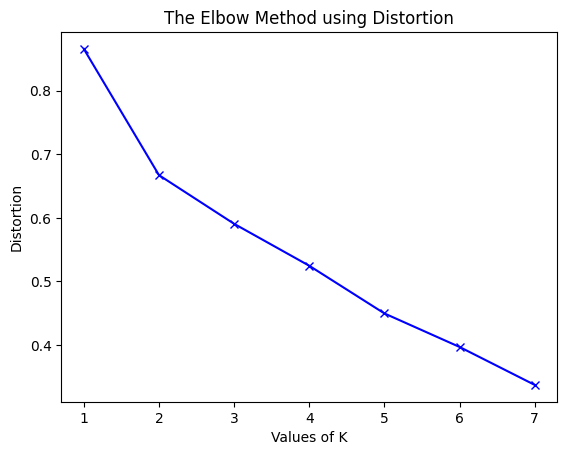

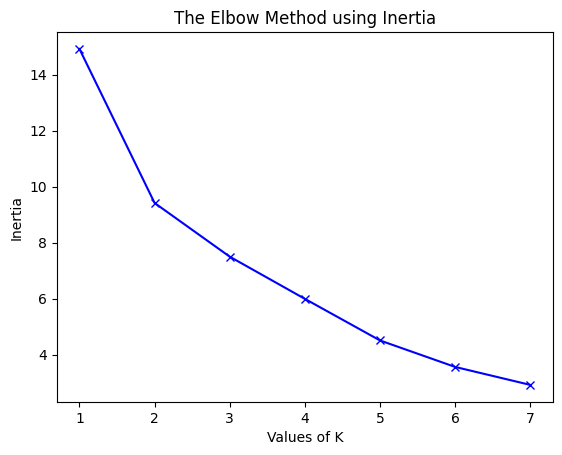

CPU times: user 3.75 s, sys: 1.32 s, total: 5.07 s
Wall time: 841 ms


In [ ]:
%%time
elbow(df)

In [ ]:
optimal = 2
kmeans = KMeans(n_clusters=optimal).fit(tf_idf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

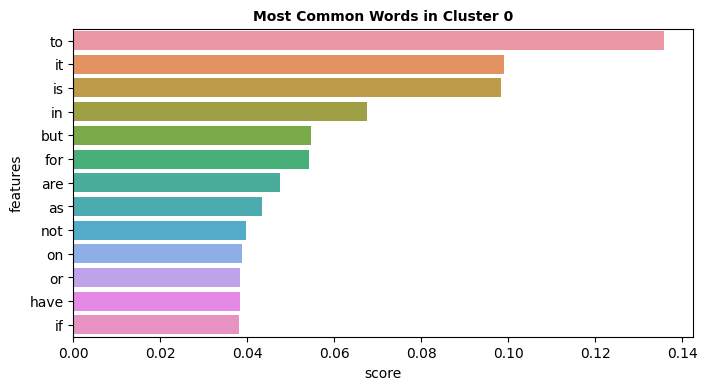

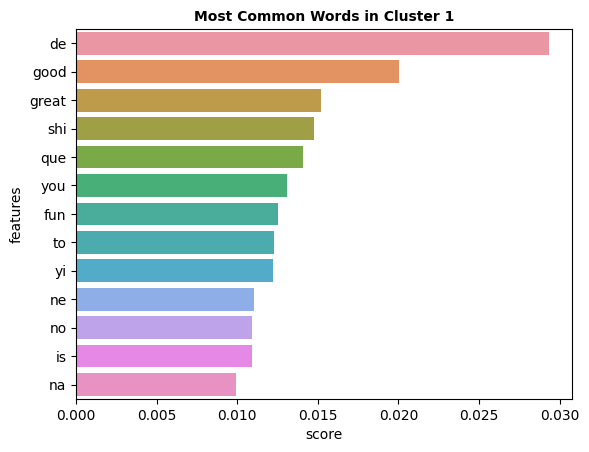

In [ ]:
final_df_array = tf_idf.to_numpy()
prediction = kmeans.predict(tf_idf)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [ ]:
!pip install wordcloud

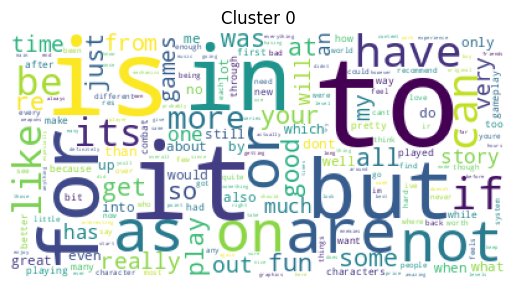

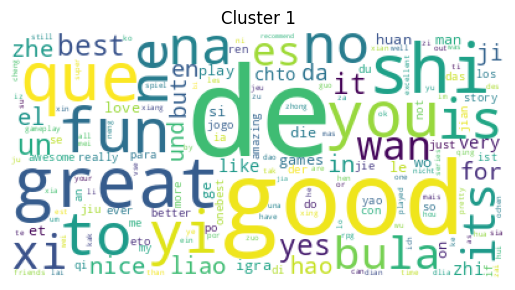

In [ ]:
from wordcloud   import WordCloud
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = tf_idf.columns
generateWordClouds(centroids)

In [ ]:
# Filter data  that have less or equal to 512 tokens
df_target = df_target[df_target['tokens'].notnull()]
#df_target.filter(len(str(df_target.tokens).split())<500)
df_target2 = df_target[df_target["tokens"].apply(lambda x: len(x) <500)]
#df["names"].apply(lambda x: len(x) > 500)
df_target2


,app_name,language,review,tokens
10,Half-Life,english,"Classic of the classics, never gets outdated. ...",classicclassics never gets outdated oldschool ...
1276,Half-Life,english,"[code]\n #+###,,::, , ...",code www w w ww www w w w w w ww code
1423,Half-Life,polish,Jak ktoś miał pirackie CD w latach 2003-2011 t...,jak ktos mial pirackie cd w latachto warto ucz...
2559,Half-Life,english,22 years old is this little game and i've just...,years old is little ive just played it for ver...
2997,Half-Life,turkish,Asla eskimedi warcraft 3 ve diablo ile tanışma...,asla eskimedi warcraftve diablo ile tanismadan...
...,...,...,...,...
1422767,ULTRAKILL,english,"One of the best fast-paced FPS ever made, and ...",onebest fastpaced fps ever made it hasnt even ...
1424485,ULTRAKILL,english,This is legitimately one of the best FPS games...,is legitimately onebest fps games ive played i...
1436797,Townscaper,italian,Best city builder ever. \nNo citizen complain.,best city builder ever no citizen complain
1437327,Townscaper,english,"It's a unique, low stress game that at the sam...",its a unique low stress at same time can be ch...


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
!pip install --upgrade transformers

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.8 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
data = df_target2["tokens"].tolist()
results=sentiment_pipeline(data)



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Extract score and label columns from results
scores = [res["score"] for res in results]
labels = [res["label"] for res in results]

# Create new dataframe with app_name, score, and label columns
new_df = pd.DataFrame({
    "app_name": df_target2["app_name"],
    "score": scores,
    "label": labels
})

In [ ]:
new_df

,app_name,score,label
10,Half-Life,0.997192,POSITIVE
1276,Half-Life,0.965920,NEGATIVE
1423,Half-Life,0.978909,NEGATIVE
2559,Half-Life,0.999645,POSITIVE
2997,Half-Life,0.993416,NEGATIVE
...,...,...,...
1422767,ULTRAKILL,0.896205,POSITIVE
1424485,ULTRAKILL,0.951971,POSITIVE
1436797,Townscaper,0.999765,POSITIVE
1437327,Townscaper,0.979395,POSITIVE


In [ ]:
counts = new_df.groupby("app_name").count()
counts

,score,label
app_name,,
20XX,37,37
A Hat in Time,24,24
A Short Hike,3,3
A Way Out,2,2
ARK: Survival Evolved,1,1
...,...,...
XCOM 2,35,35
Yakuza 0,49,49
Youtubers Life,8,8
